In [14]:
import numpy as np
import pandas as pd

# One-hot Encoder

In [15]:
from sklearn.preprocessing import OneHotEncoder

In [16]:
level = np.array(['Lower', 'Middle', 'Upper'])
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
onehot_level = onehot_encoder.fit_transform(level.reshape(-1, 1))
print(onehot_level)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [17]:
print(onehot_encoder.inverse_transform([[1., 0., 0.]]))

[['Lower']]


# Bag-of-Words

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

In [19]:
doc1 = "Doctor Who is a wonderful TV series! I've watched all the episodes."
doc2 = "Doctor Who is the best TV series!"
doc3 = "Doctor Who is very nice."

corpus = [doc1, doc2, doc3]

In [20]:
# TF as weight
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names_out())

['all' 'best' 'doctor' 'episodes' 'is' 'nice' 'series' 'the' 'tv' 've'
 'very' 'watched' 'who' 'wonderful']


In [22]:
df_bow_sklearn = pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names_out())
df_bow_sklearn.head()

,all,best,doctor,episodes,is,nice,series,the,tv,ve,very,watched,who,wonderful
0,1,0,1,1,1,0,1,1,1,1,0,1,1,1
1,0,1,1,0,1,0,1,1,1,0,0,0,1,0
2,0,0,1,0,1,1,0,0,0,0,1,0,1,0


# TF-IDF

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [24]:
doc1 = "Doctor Who is a wonderful TV series! I've watched all the episodes."
doc2 = "Doctor Who is the best TV series!"
doc3 = "Doctor Who is very nice."

corpus = [doc1, doc2, doc3]

In [25]:
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf_vectorize = tfidf_vectorizer.fit_transform(corpus)

In [27]:
df_tf_idf = pd.DataFrame(X_train_tfidf_vectorize.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
df_tf_idf.shape

(3, 14)

In [28]:
df_tf_idf.head()

,all,best,doctor,episodes,is,nice,series,the,tv,ve,very,watched,who,wonderful
0,0.358479,0.00000,0.211723,0.358479,0.211723,0.000000,0.272632,0.272632,0.272632,0.358479,0.000000,0.358479,0.211723,0.358479
1,0.000000,0.51423,0.303713,0.000000,0.303713,0.000000,0.391085,0.391085,0.391085,0.000000,0.000000,0.000000,0.303713,0.000000
2,0.000000,0.00000,0.338381,0.000000,0.338381,0.572929,0.000000,0.000000,0.000000,0.000000,0.572929,0.000000,0.338381,0.000000


# Using text representations in ML models

In [29]:
# News dataset
from sklearn.datasets import fetch_20newsgroups

# One-hot encoder
from sklearn.preprocessing import OneHotEncoder

# Bag-of-words
from sklearn.feature_extraction.text import CountVectorizer

# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

# ML Model
from	sklearn.naive_bayes	import	MultinomialNB

# Metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [32]:
cats = ['sci.electronics', 'sci.med', 'sci.space']

In [33]:
train_data = fetch_20newsgroups(subset='train', categories=cats, shuffle=True, random_state=42)

In [34]:
print(len(train_data.data))

1778


In [35]:
print(train_data.data[0])
print("Target: ", train_data.target[0])

From: landis@stsci.edu (Robert Landis,S202,,)
Subject: Re: Space Debris
Reply-To: landis@stsci.edu
Organization: Space Telescope Science Institute, Baltimore MD
Lines: 14

Another fish to check out is Richard Rast -- he works
for Lockheed Missiles, but is on-site at NASA Johnson.

Nick Johnson at Kaman Sciences in Colo. Spgs and his
friend, Darren McKnight at Kaman in Alexandria, VA.

Good luck.

R. Landis

"Behind every general is his wife.... and...
 behind every Hillary is a Bill . ."



Target:  2


In [36]:
#vectorizer = CountVectorizer()    # tf
vectorizer = TfidfVectorizer()    # tf-idf

train_ = train_data.data

X_train_tfidf_vectorize = vectorizer.fit_transform(train_)

In [37]:
clf = MultinomialNB()
clf.fit(X_train_tfidf_vectorize, train_data.target)

MultinomialNB()

Model evaluation 

In [38]:
test_data = fetch_20newsgroups(subset='test', categories=cats, shuffle=True, random_state=42)
docs_test = test_data.data

vect_transform = vectorizer.transform(docs_test)
predicted = clf.predict(vect_transform)

print(metrics.classification_report(test_data.target, predicted, target_names=test_data.target_names))

print(clf.classes_)

                 precision    recall  f1-score   support

sci.electronics       0.95      0.90      0.92       393
        sci.med       0.94      0.94      0.94       396
      sci.space       0.92      0.97      0.94       394

       accuracy                           0.94      1183
      macro avg       0.94      0.94      0.94      1183
   weighted avg       0.94      0.94      0.94      1183

[0 1 2]


# Embeddings


## Pretrained model: Glove



In [39]:
import gensim.downloader

In [40]:
glove_vectors = gensim.downloader.load('glove-wiki-gigaword-50')

[=================================================-] 98.6% 65.0/66.0MB downloaded

## Visualizando os Embeddings

In [41]:
glove_vectors.wv['computer']

<ipython-input-41-e22852a42941>:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  glove_vectors.wv['computer']


array([ 0.079084, -0.81504 ,  1.7901  ,  0.91653 ,  0.10797 , -0.55628 ,
       -0.84427 , -1.4951  ,  0.13418 ,  0.63627 ,  0.35146 ,  0.25813 ,
       -0.55029 ,  0.51056 ,  0.37409 ,  0.12092 , -1.6166  ,  0.83653 ,
        0.14202 , -0.52348 ,  0.73453 ,  0.12207 , -0.49079 ,  0.32533 ,
        0.45306 , -1.585   , -0.63848 , -1.0053  ,  0.10454 , -0.42984 ,
        3.181   , -0.62187 ,  0.16819 , -1.0139  ,  0.064058,  0.57844 ,
       -0.4556  ,  0.73783 ,  0.37203 , -0.57722 ,  0.66441 ,  0.055129,
        0.037891,  1.3275  ,  0.30991 ,  0.50697 ,  1.2357  ,  0.1274  ,
       -0.11434 ,  0.20709 ], dtype=float32)

In [42]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [43]:
words = ['computer', 'science', 'software', 'intelligence', 'internet', 'car', 'bike', 'truck']
vets = glove_vectors[words]

vets_2d = PCA(random_state=0).fit_transform(vets)[:, :2]

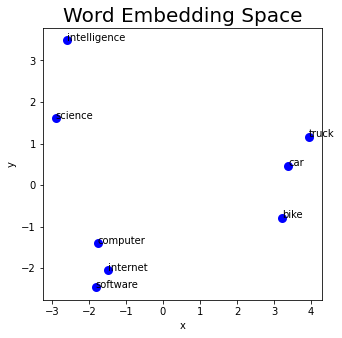

In [44]:
plt.figure(figsize=(5, 5))
plt.scatter(vets_2d[:,0], vets_2d[:,1], linewidths=3, color='blue')
plt.xlabel("x", size = 10)
plt.ylabel("y", size = 10)
plt.title("Word Embedding Space", size = 20)

for i, word in enumerate(words):
  plt.annotate(word, xy = (vets_2d[i, 0], vets_2d[i, 1]))

## Word similarity

In [45]:
glove_vectors.most_similar("computer", topn=5)

[('computers', 0.9165046215057373),
 ('software', 0.8814994096755981),
 ('technology', 0.852556049823761),
 ('electronic', 0.812586784362793),
 ('internet', 0.8060455322265625)]

In [46]:
glove_vectors.most_similar(positive=['king', 'woman'], negative=['man'], topn=1)

[('queen', 0.8523603677749634)]

#  Word embeddings for sentiment analysis

## Loading and pre-processing the dataset

In [47]:
# Downloading reviews from Amazon (https://nijianmo.github.io/amazon/index.html).
!wget https://github.com/ProfLuciano/pln_dl/raw/main/datasets/AMAZON_FASHION_5.json.gz

!gzip -d AMAZON_FASHION_5.json.gz

import json

reviews = []
for review in open("AMAZON_FASHION_5.json", "r"):
  reviews.append(json.loads(review))

# Loading the reviews and ratings 
reviews_only = []
for r in reviews:
  if set(["reviewText", "overall"]).issubset(r.keys()):
    reviews_only.append({'review': r['reviewText'],
                        'rating': r['overall'], })

reviews_df = pd.DataFrame(reviews_only)

reviews_df.sample(5)

--2023-03-07 08:29:20--  https://github.com/ProfLuciano/pln_dl/raw/main/datasets/AMAZON_FASHION_5.json.gz
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ProfLuciano/pln_dl/main/datasets/AMAZON_FASHION_5.json.gz [following]
--2023-03-07 08:29:20--  https://raw.githubusercontent.com/ProfLuciano/pln_dl/main/datasets/AMAZON_FASHION_5.json.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 287013 (280K) [application/octet-stream]
Saving to: ‘AMAZON_FASHION_5.json.gz’

AMAZON_FASHION_5.js 100%[===================>] 280.29K  --.-KB/s    in 0.03s   

2023-03-07 08:29:20 (8.70 MB/s) - ‘AMAZON_FASHION_5.

,review,rating
1110,After less than a week the sole ripped off on ...,1.0
1827,They fit perfectly. These shoes are great for ...,5.0
3053,"These shoes look really great. However, slight...",3.0
568,Glad I read the reviews and ordered a half siz...,5.0
1581,Perfict fit for me. Great looking shoes at a g...,5.0


In [48]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3160 entries, 0 to 3159
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   review  3160 non-null   object 
 1   rating  3160 non-null   float64
dtypes: float64(1), object(1)
memory usage: 49.5+ KB


In [49]:
# Pre-processing to train the Word2Vec model
import nltk
from nltk.tokenize import word_tokenize
# Sentence tokenizer
nltk.download('punkt')

tokenized_sents = [word_tokenize(i) for i in reviews_df['review'].values]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


## Word2Vec model training

In [50]:
from gensim.models import Word2Vec
model_review = Word2Vec(tokenized_sents, size=50, window=5, min_count=1, workers=4)

In [51]:
model_review['hat']

<ipython-input-51-5c938e3bc405>:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  model_review['hat']


array([-0.0036558 ,  0.00543441, -0.01415282, -0.0102281 , -0.00112001,
        0.00893957, -0.00438349, -0.00375832,  0.00775339,  0.00696879,
       -0.0138227 ,  0.00837663, -0.01483615, -0.00928367, -0.0050272 ,
       -0.00515317,  0.00662946,  0.00227478, -0.00559227, -0.0017259 ,
        0.00319551, -0.01707535,  0.00252604,  0.00714869,  0.00701857,
        0.00659045, -0.00462356,  0.00603422, -0.01811013, -0.00232506,
       -0.01121718,  0.00257193,  0.00163972, -0.01685311, -0.00202698,
        0.00828756, -0.00523183, -0.00893312, -0.00721142,  0.00415273,
        0.00638724, -0.01675979, -0.00118393, -0.00604048, -0.00652049,
        0.00017343,  0.0182262 , -0.01144928,  0.01456657,  0.00031475],
      dtype=float32)

In [52]:
model_review['shoe']

<ipython-input-52-fc4f22b1d59f>:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  model_review['shoe']


array([-0.04492787,  0.14303428, -0.5886915 , -0.6233382 ,  0.47425753,
        0.39665195,  0.0125386 , -0.479554  , -0.0582535 , -0.15224989,
       -0.9755725 ,  0.08863985, -0.35172567, -0.69195354,  0.01324374,
        0.1252765 ,  0.44851178,  0.51575536, -0.378341  , -0.15437774,
       -0.03714512, -1.1046635 ,  0.39775124,  0.08639248,  0.7472658 ,
       -0.1160992 ,  0.4545284 , -0.07603815, -0.87085694,  0.0328628 ,
       -0.14437856, -0.08280274, -0.6177418 , -0.9048694 ,  0.08693212,
        0.0510717 , -0.45238712, -0.45680264, -0.6273027 , -0.32454747,
        0.14564338, -0.5821431 , -0.37425935, -0.13993438, -0.5815548 ,
        0.26549143,  0.7913751 , -0.4338665 ,  0.5666808 , -0.30587643],
      dtype=float32)

## More pre-processing...


In [53]:
# Calculating the max sentence length
X, y = [], []
max_len = 0

for i, row in reviews_df.iterrows():
  vetores = model_review[word_tokenize(row['review'])]

  max_len = max(max_len, len(vetores))
  X.append(vetores)
  y.append(row['rating']-1)
print("max_len: {}".format(max_len))

<ipython-input-53-738cedb30b7f>:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  vetores = model_review[word_tokenize(row['review'])]


max_len: 311


In [54]:
# Adding padding

def transform(examples, dimension):
  results = np.zeros((len(examples), dimension, 50))
  for i, sequence in enumerate(examples):
    results[i, :len(sequence), :] = sequence
  return results
 
X = transform(X, max_len)
y = np.array(y).astype("float32")

In [55]:
# Verificando o shape dos dados pré-processados (instâncias,tokens,num de dimensões do embedding)
X.shape

(3160, 311, 50)

## Split the data

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

## Network architecture




In [57]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

model = Sequential()
model.add(Flatten(input_shape=(max_len, 50)))
model.add(Dense(1000, activation='relu')),
model.add(Dropout(0.3))
model.add(Dense(1000, activation='relu')),
model.add(Dropout(0.3))
model.add(Dense(1000, activation='relu')),
model.add(Dense(5, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 15550)             0         
                                                                 
 dense (Dense)               (None, 1000)              15551000  
                                                                 
 dropout (Dropout)           (None, 1000)              0         
                                                                 
 dense_1 (Dense)             (None, 1000)              1001000   
                                                                 
 dropout_1 (Dropout)         (None, 1000)              0         
                                                                 
 dense_2 (Dense)             (None, 1000)              1001000   
                                                                 
 dense_3 (Dense)             (None, 5)                 5

In [58]:
model.compile(
 optimizer = "adam",
 loss = "sparse_categorical_crossentropy",
 metrics = ["accuracy"]
)

In [59]:
results = model.fit(
 X_train, y_train,
 epochs= 5,
 batch_size = 100,
 validation_data = (X_test, y_test)
)

Epoch 1/5
23/23 [==============================] - 15s 533ms/step - loss: 1.0743 - accuracy: 0.6569 - val_loss: 0.8207 - val_accuracy: 0.6878
Epoch 2/5
23/23 [==============================] - 11s 471ms/step - loss: 0.7745 - accuracy: 0.7138 - val_loss: 0.6615 - val_accuracy: 0.7405
Epoch 3/5
23/23 [==============================] - 13s 556ms/step - loss: 0.5763 - accuracy: 0.7722 - val_loss: 0.4706 - val_accuracy: 0.8217
Epoch 4/5
23/23 [==============================] - 12s 548ms/step - loss: 0.3928 - accuracy: 0.8662 - val_loss: 0.2984 - val_accuracy: 0.9061
Epoch 5/5
23/23 [==============================] - 13s 565ms/step - loss: 0.2834 - accuracy: 0.9001 - val_loss: 0.2526 - val_accuracy: 0.9219
